# COVID-19 PANDEMIC PREDICTION PROJECT

###  1. Define problem:
- Goal: Predict newcase infected next day using data of `21` days ago in USA (example)

### 2. Feature Selection:
- Choose feature to train ML model (Linear Regression)

### 3. Spliting the Dataset
- `data`: `dataset`
- `X`: `data[feature]`
- `y`: target variable `new_cases`

### 4. ML model
- Linear Regression

## 1. Load Data 
Data's description here: https://github.com/owid/covid-19-data/tree/master/public/data

In [2]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
file_name = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(file_name)
df.head()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
cols = ['iso_code', 'continent', 'location', 'date','population', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths','new_deaths_smoothed', 'reproduction_rate',
       'stringency_index','icu_patients','hosp_patients','new_tests','positive_rate','stringency_index']

In [ ]:
# Get data in USA and some filtered columns 
df = df[df['location']=='United States'][cols]

In [ ]:
# Fill "0" at Null position 
df = df.fillna(0)

In [ ]:
df.tail()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,stringency_index,icu_patients,hosp_patients,new_tests,positive_rate,stringency_index
113204,USA,North America,United States,2021-09-19,332915074.0,42088171.0,37533.0,147285.000,673774.0,302.0,1927.857,0.94,61.57,23775.0,83496.0,566557.0,0.101,61.57
113205,USA,North America,United States,2021-09-20,332915074.0,42289819.0,201648.0,138927.286,676076.0,2302.0,1947.429,0.93,61.57,23656.0,83531.0,347115.0,0.106,61.57
113206,USA,North America,United States,2021-09-21,332915074.0,42410607.0,120788.0,135563.571,678407.0,2331.0,2031.429,0.92,61.57,23381.0,82469.0,0.0,0.000,61.57
113207,USA,North America,United States,2021-09-22,332915074.0,42543510.0,132903.0,130794.857,681192.0,2785.0,2047.000,0.00,0.00,23337.0,82328.0,0.0,0.000,0.00
113208,USA,North America,United States,2021-09-23,332915074.0,42672241.0,128731.0,126619.714,684349.0,3157.0,2010.857,0.00,0.00,0.0,0.0,0.0,0.000,0.00


In [ ]:
# Set date is index
data = df.set_index('date')
data.head()

,iso_code,continent,location,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,stringency_index,icu_patients,hosp_patients,new_tests,positive_rate,stringency_index
date,,,,,,,,,,,,,,,,,
2020-01-22,USA,North America,United States,332915074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,USA,North America,United States,332915074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,USA,North America,United States,332915074.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,USA,North America,United States,332915074.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,USA,North America,United States,332915074.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


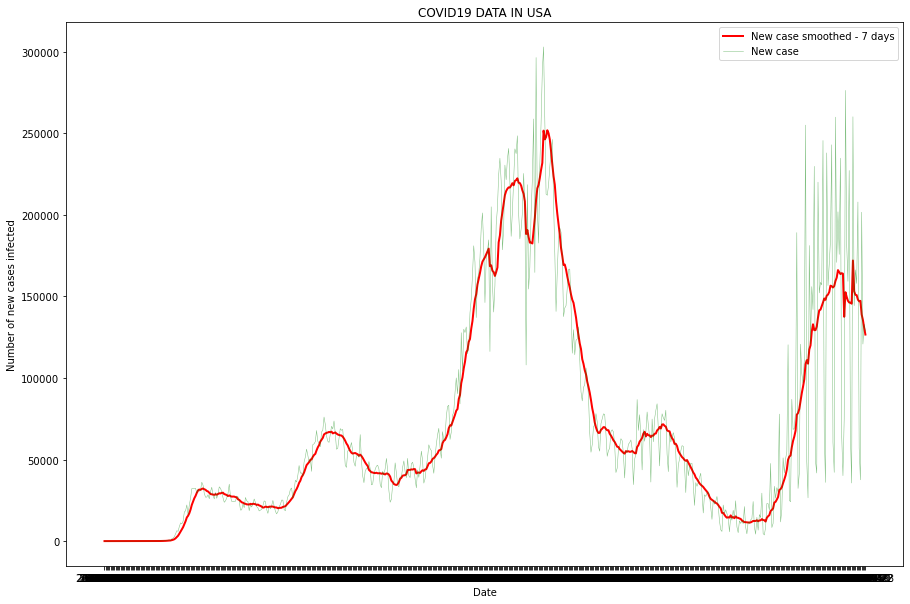

In [ ]:
# Visualizing data
# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(data.index, data.new_cases_smoothed,color='red', label="New case smoothed - 7 days", linewidth=2)
ax.plot(data.index, data.new_cases,color='green', label="New case", linewidth= 0.5, alpha=.5)
ax.set_title("COVID19 DATA IN USA")
ax.set_xlabel("Date")
ax.set_ylabel("Number of new cases infected")
plt.legend()
plt.show()

#### ==> We use `new_cases_smoothed` for target variable to prection model

## 2. Choosing feature for ML model

In [ ]:
# Correlation Matrix
corr_matrix = data.corr()

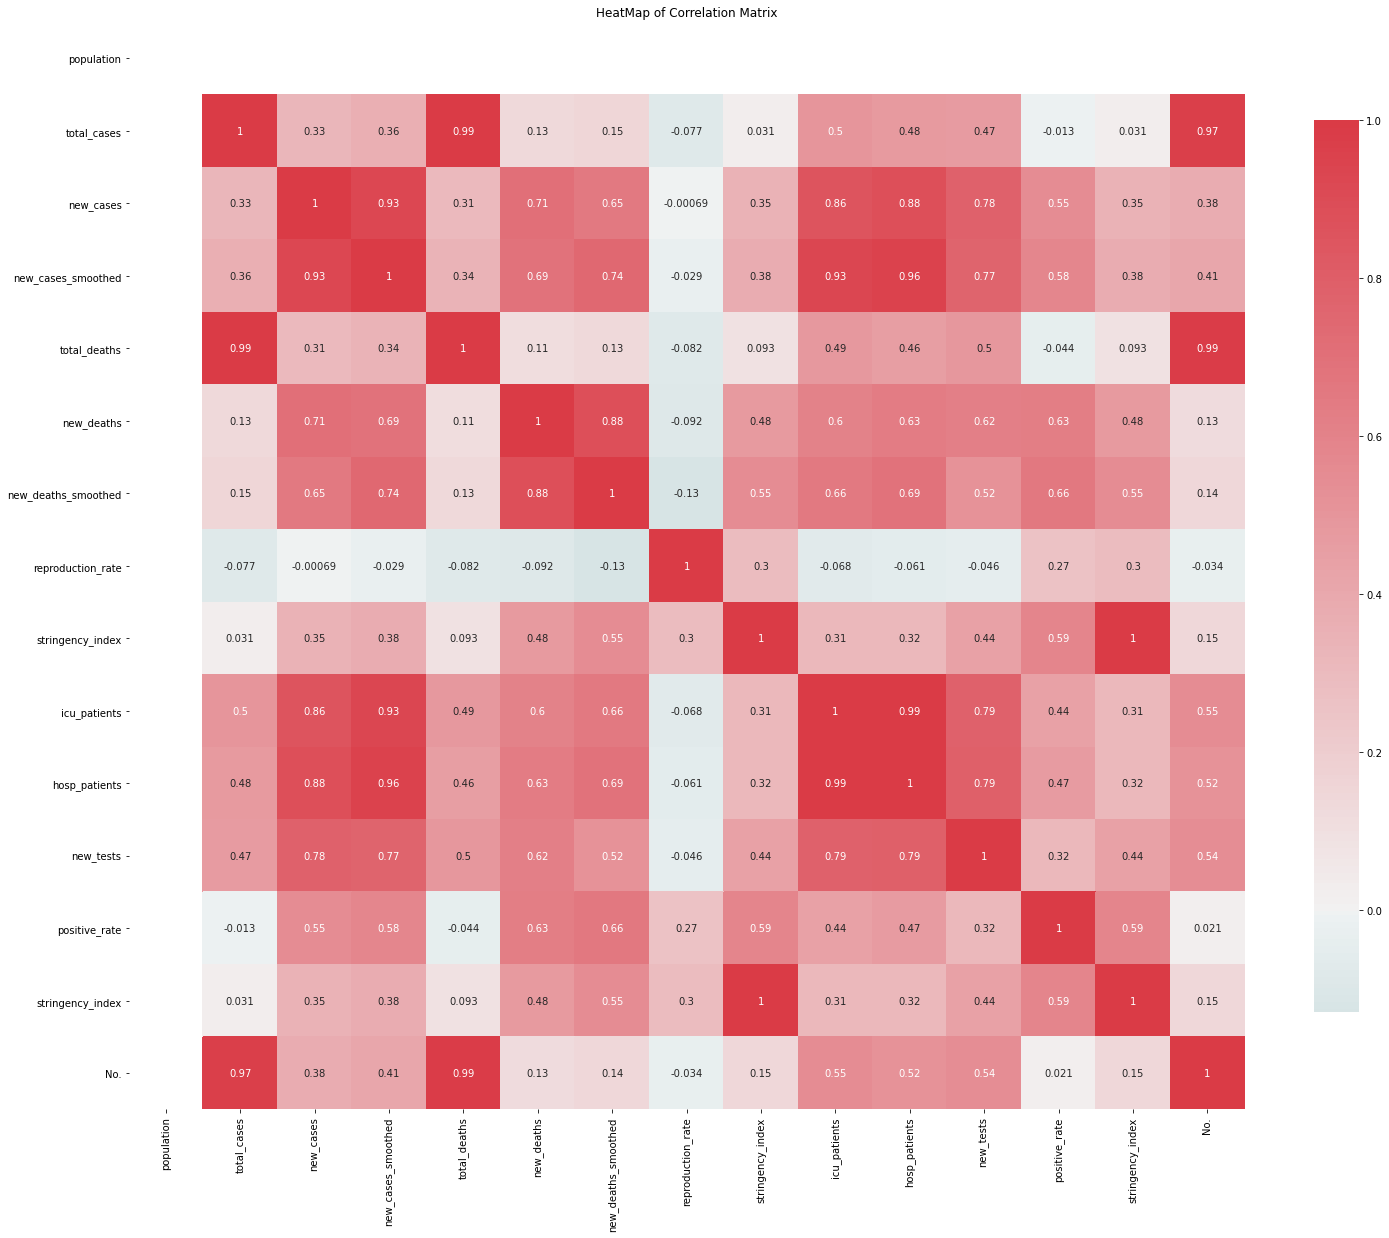

In [ ]:
import seaborn as sns

# Plot heatmap
plt.figure(figsize=(25,20))
cmap = sns.diverging_palette(200,10,as_cmap = True)

sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values,
           cmap= cmap, vmax =1, center= 0, annot=True,cbar_kws={"shrink":0.82})
plt.title("HeatMap of Correlation Matrix")
plt.show()

In [ ]:
# Looking at corr values in new_cases_smoothed 
corr_matrix['new_cases_smoothed'].sort_values(ascending=False)

new_cases_smoothed     1.000000
hosp_patients          0.958436
icu_patients           0.933295
new_cases              0.927853
new_tests              0.767899
new_deaths_smoothed    0.741324
new_deaths             0.687423
positive_rate          0.581475
stringency_index       0.379442
stringency_index       0.379442
total_cases            0.363992
total_deaths           0.341816
reproduction_rate     -0.028907
population                  NaN
Name: new_cases_smoothed, dtype: float64

## 3. Prepare dataset to training

In [ ]:
l = list(range(0,len(data),1))
data['No.'] = pd.DataFrame(l, index = data.index)

In [ ]:
# Choose feature
feature = ['No.','hosp_patients', 'icu_patients','new_tests','new_deaths']
target = ['new_cases_smoothed']

In [ ]:
X= data[feature]
y = data[target]

In [ ]:
X.shape

(611, 5)

In [ ]:
y.shape

(611, 1)

In [ ]:
data.tail()

,iso_code,continent,location,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,stringency_index,icu_patients,hosp_patients,new_tests,positive_rate,stringency_index,No.
date,,,,,,,,,,,,,,,,,,
2021-09-19,USA,North America,United States,332915074.0,42088171.0,37533.0,147285.000,673774.0,302.0,1927.857,0.94,61.57,23775.0,83496.0,566557.0,0.101,61.57,606
2021-09-20,USA,North America,United States,332915074.0,42289819.0,201648.0,138927.286,676076.0,2302.0,1947.429,0.93,61.57,23656.0,83531.0,347115.0,0.106,61.57,607
2021-09-21,USA,North America,United States,332915074.0,42410607.0,120788.0,135563.571,678407.0,2331.0,2031.429,0.92,61.57,23381.0,82469.0,0.0,0.000,61.57,608
2021-09-22,USA,North America,United States,332915074.0,42543510.0,132903.0,130794.857,681192.0,2785.0,2047.000,0.00,0.00,23337.0,82328.0,0.0,0.000,0.00,609
2021-09-23,USA,North America,United States,332915074.0,42672241.0,128731.0,126619.714,684349.0,3157.0,2010.857,0.00,0.00,0.0,0.0,0.0,0.000,0.00,610


## 4. ML Model 

#### Training model  all dataset to define accuracy score

In [ ]:
X= data[feature].values
y = data[target].values

In [ ]:
import numpy as np
idd = 0
day_train_loop = pd.DataFrame(index =['Mean error'])
for i in range(14,61):
    day_train = i
    pred_day = 100
    y_predict=[]
    y_true=[]
    error =[]
    for k in range(len(data)-pred_day):
            X_train = X[pred_day-day_train-2:pred_day-2,:]
            y_train = y[pred_day-day_train-1:pred_day-1,:]
            regressor = LinearRegression().fit(X_train,y_train)
            y_pred = regressor.predict(X[pred_day,:].reshape(1,-1))
            y_tru = data.iloc[pred_day,5]
            y_predict.append(y_pred)
            y_true.append(y_tru)
            error.append(abs(y_tru-y_pred))
            pred_day +=1
            X_train =[]
            y_train =[]
    # Insert average of error on dataframe
    day_train_loop.insert(idd,"%s_days" %i ,round(np.array(error).mean(),0))
    idd +=1


In [ ]:
day_train_loop

,14_days,15_days,16_days,17_days,18_days,19_days,20_days,21_days,22_days,23_days,...,51_days,52_days,53_days,54_days,55_days,56_days,57_days,58_days,59_days,60_days
Mean error,18117.0,17887.0,18217.0,17742.0,17685.0,17636.0,17379.0,17403.0,17371.0,17336.0,...,17876.0,17821.0,17800.0,17797.0,17863.0,17892.0,17918.0,17943.0,17957.0,17979.0


In [ ]:
day_train_loop.min(axis=1)

Mean error    17336.0
dtype: float64

In [ ]:
day_train = 23
pred_day = 100
y_predict=[]
y_true=[]
error =[]
for k in range(len(data)-pred_day):
            X_train = X[pred_day-day_train-2:pred_day-2,:]
            y_train = y[pred_day-day_train-1:pred_day-1,:]
            regressor = LinearRegression().fit(X_train,y_train)
            y_pred = regressor.predict(np.array(X[pred_day,:]).reshape(1,-1))
            y_tru = data.iloc[pred_day,5]
            y_predict.append(y_pred)
            y_true.append(y_tru)
            error.append(abs(y_tru-y_pred))
            pred_day +=1
            X_train =[]
            y_train =[]

In [ ]:
np.array(error).mean()

17335.642153278946

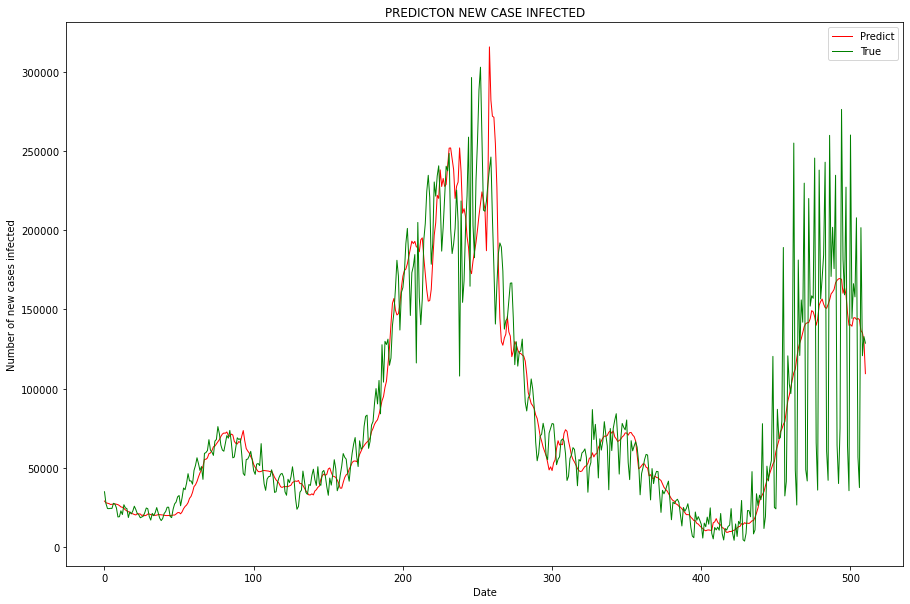

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(data[0:len(y_predict)]['No.'].values.reshape(-1,1), np.array(y_predict).reshape(-1,1),color='red', label="Predict", linewidth=1)
ax.plot(data[0:len(y_predict)]['No.'].values.reshape(-1,1), np.array(y_true).reshape(-1,1),color='green', label="True", linewidth=1)
ax.set_title("PREDICTON NEW CASE INFECTED")
ax.set_xlabel("Date")
ax.set_ylabel("Number of new cases infected")
plt.legend()
plt.show()